# Main Pipeline

This jupyter notebook deals with data preprocessing for further analysis in the PyClone, SciClone, TitanCNA, FastClone and PyClone-VI libraries. A prepared .vcf file and data obtained from the variant calling process are required for launch. For the preparation of variants, it is recommended to use the CNVpytor library, which ensures that the resulting data is immediately suitable for preprocessing without further modifications. When using other libraries, it is necessary to edit the data into the format below.

## Copy Calling

For copy calling, we recommend using CNVpytor or the CNVnator library. Both libraries are suitable for preparing variants as they work identically and return the same formats. CNVpytor serves as an extension of the CNVnator library for compatibility with the Python programming language.

Specific details on the use of this tool can be found in the file **copyCalling.md**



### Format of variant calling results file (.tsv)

If you decide to use another library for the preparation of variants, you must follow the following guidelines. In general, this file must be in .tsv (Tab separated values) format. Values can be separated by tabs or number of whitespaces. The program does not recognizes other types of separators and will ignore them. **Columns required:**

- CNV type - "deletion" or "duplication"
- CNV region - chr:start-end
- CNV size - end-start
- CNV level - read depth normalized to 1
- e-val1 - e-value (p-value multiplied by genome size divided by bin size) calculated using t-test statistics between RD statistics in the region and global
- e-val2 - e-value (p-value multiplied by genome size divided by bin size) from the probability of RD values within the region to be in the tails of a gaussian distribution of binned RD
- e-val3 - same as e-val1 but for the middle of CNV
- e-val4 - same as e-val2 but for the middle of CNV
- q0 - fraction of reads mapped with q0 quality in call region
- pN - fraction of reference genome gaps (Ns) in call region
- dG - distance from closest large (>100bp) gap in reference genome


Subsequently, this jupyter notebook runs all tools and saves the necessary results.

In [1]:
import main
from sklearn.pipeline import Pipeline 
import pandas as pd
#import cnvpytor

Loading of an input VCF file. Stored in a separate cell for easier data reloading.

In [2]:
# Reading and making dataframe out of .vcf file
main_vcf = main.load_vcf_file('./DO52567.vcf')
main_vcf.head()

,CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,DO52567
0,chr1,39261,rs200677948,T,C,42.64,.,AC=1;AF=0.500;AN=2;BaseQRankSum=-0.431;DB;DP=3...,GT:AD:DP:GQ:PL,"0/1:1,2:3:20:50,0,20"
1,chr1,55164,rs3091274,C,A,53.32,.,AC=2;AF=1.00;AN=2;DB;DP=2;ExcessHet=0.0000;FS=...,GT:AD:DP:GQ:PL,"1/1:0,2:2:6:65,6,0"
2,chr1,55249,rs200769871,C,CTATGG,78.28,.,AC=2;AF=1.00;AN=2;DB;DP=2;ExcessHet=0.0000;FS=...,GT:AD:DP:GQ:PL,"1/1:0,2:2:6:90,6,0"
3,chr1,55299,rs10399749,C,T,51.64,.,AC=1;AF=0.500;AN=2;BaseQRankSum=0.000;DB;DP=3;...,GT:AD:DP:GQ:PL,"0/1:1,2:3:25:59,0,25"
4,chr1,84010,rs186443818,G,A,56.84,.,AC=2;AF=1.00;AN=2;DB;DP=5;ExcessHet=0.0000;FS=...,GT:AD:DP:GQ:PL,"1/1:0,4:4:9:70,9,0"


Representation of the copy calling file. It is used for the user to make sure that all chromosomes have been loaded. The file must correspond visually with the sample file mentioned in the thesis.

/Users/simon/.virtualenvs/cnvator-env/lib/python3.9/site-packages/cnvpytor/viewer.py:2469: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.yaxis.set_ticklabels([str(int(2 * t)) for t in yticks])


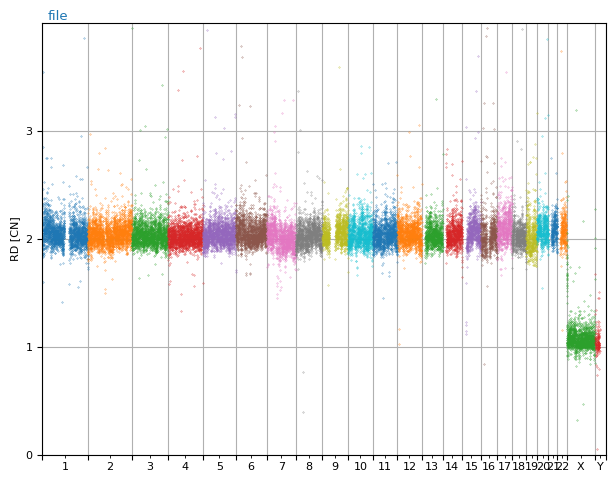

<Figure size 640x480 with 0 Axes>

In [1]:
view = cnvpytor.Viewer(["copyCaller/inputFile/file.pytor"], params={} )
view.bin_size = 100000
view.rd_use_mask = True 
view.markersize = 0.5
view.rd_manhattan_range = [0, 2]
view.global_plot()

Loading of an result file from Copy Caller. Stored in a separate cell for easier data reloading.

In [4]:
# Reading and making dataframe out of Copy Caller results file
cnvnator_df = pd.read_csv('./copyCaller/results/output.tsv',  names=['file_name', 'method', 'CNV Type', 'chr', 'CNV Region Start', 'CNV Region End', 'CNV size', 'CNV level', 'e-val1', 'e-val2', 'e-val3', 'e-val4', 'q0', 'pN', 'dG'], delimiter=r"\s+")
cnvnator_df.head()

,file_name,method,CNV Type,chr,CNV Region Start,CNV Region End,CNV size,CNV level,e-val1,e-val2,e-val3,e-val4,q0,pN,dG
0,file,rd_mean_shift,deletion,1,180001.0,220000.0,40000.0,0.000405,3.970129e-07,0.000000e+00,3.970129e-07,0.000000e+00,1.000000,1.000000,0.0
1,file,rd_mean_shift,deletion,1,260001.0,320000.0,60000.0,0.142411,8.189110e+00,1.907243e-35,8.189110e+00,1.907243e-35,0.916184,0.833333,0.0
2,file,rd_mean_shift,deletion,1,470001.0,530000.0,60000.0,0.117525,3.338000e+00,2.064495e-60,3.338000e+00,2.064495e-60,0.675772,0.833333,0.0
3,file,rd_mean_shift,deletion,1,1620001.0,1690000.0,70000.0,0.703857,3.192341e-01,1.552946e-09,3.192341e-01,1.552946e-09,0.372246,0.000000,944400.0
4,file,rd_mean_shift,deletion,1,2630001.0,2680000.0,50000.0,0.084009,7.421955e+00,0.000000e+00,7.421955e+00,0.000000e+00,0.324025,0.915600,0.0


Main pipeline

In [5]:
pipeline_singleSample = Pipeline([
        # Extracting needed information and categorizing into columns
        ('vcfDataExtraction', main.VcfDataExtractionTransformer()),
        # Filter quality reads
        ('filterQuality', main.FilterQualityTransformer(percentage=90)),
        # Merging Copy Caller results with .vcf file
        ('copyCallsMerge', main.CopyCallsMergeTransformer(cnvnator_df)),
        # Data preparation for PyClone and PyClone-VI
        ('pyCloneDataPreparation', main.PyCloneTransformer(samples=300)),
        # Data preparation for SciClone
        ('sciCloneDataPreparation', main.SciCloneTransformer(cnvnator_df)),
        # Creation of copy number coverage file for TitanCNA
        ('coverageFilePreparation', main.CoverageFileTransformer(cnvnator_df)),
        # Data preparation for TitanCNA
        ('titanCNADataPreparation', main.TitanCNATransformer()),
        # Data preparation for FastClone
        ('fastCloneDataPreparation', main.FastCloneTransformer()),
        # Running PyClone-VI tool
        ('pyCloneVI', main.PyCloneVI()),
        # Running TitanCNA tool
        ('titanCNA', main.TitanCNA()),
        # Running SciClone tool
        ('sciClone', main.SciClone()),
        # Running FastClone tool
        ('fastClone', main.FastClone()),
        
]) 

final_df = pipeline_singleSample.transform(main_vcf)

final_df

There were 12 warnings (use warnings() to see them)
Running TITAN...
titan: Loading data ./InputFiles/TitanCNA/Titancna.het
titan: Loading GC content and mappability corrected log2 ratios...
titan: Extracting read depth...
Removed Chrs: 
titan: Loading default parameters
titan: Using 1 cores.
titan: Parameter estimation
Optimal state path computation: Using 1 cores.
Writing results to ./Results/TitanCNA//TitanCNA_cluster01.titan.txt, ./Results/TitanCNA//TitanCNA_cluster01.segs.txt, ./Results/TitanCNA//TitanCNA_cluster01.params.txt
titan: Saving parameters to ./Results/TitanCNA//TitanCNA_cluster01.params.txt


$dens.bw
[1] 0.2387662

$scat
[1] 0.5538911

$S_Dbw
[1] 0.7926573



Fontconfig warning: ignoring UTF-8: not a valid region tag


null device 
          1 
null device 
          1 
null device 
          1 
null device 
          1 
null device 
          1 
null device 
          1 


,CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,DO52567,GENOTYPE,ALLELIC DEPTH,DEPTH,GENOTYPE QUALITY,PHRED-SCALED LIKELIHOODS,ALLELIC FREQUENCY,MINOR ALLELE COPY NUMBER,MAJOR ALLELE COPY NUMBER
42,chr1,790733,.,C,CAATGG,142.60,.,AC=1;AF=0.500;AN=2;BaseQRankSum=-1.156;DP=14;E...,GT:AD:DP:GQ:PL,"0/1:6,4:10:99:150,0,219",0/1,"6,4",10,99,"150,0,219",0.500,0,2
91,chr1,855373,rs74609473,CAT,C,109.60,.,AC=1;AF=0.500;AN=2;BaseQRankSum=-1.440;DB;DP=1...,GT:AD:DP:GQ:PL,"0/1:3,3:6:99:117,0,117",0/1,"3,3",6,99,"117,0,117",0.500,0,2
441,chr1,1366183,rs199546086,TGA,T,104.60,.,AC=1;AF=0.500;AN=2;BaseQRankSum=0.598;DB;DP=7;...,GT:AD:DP:GQ:PL,"0/1:3,3:6:99:112,0,112",0/1,"3,3",6,99,"112,0,112",0.500,0,2
669,chr1,1898612,rs142234461,CAT,C,136.60,.,AC=1;AF=0.500;AN=2;BaseQRankSum=-3.087;DB;DP=1...,GT:AD:DP:GQ:PL,"0/1:8,4:12:99:144,0,324",0/1,"8,4",12,99,"144,0,324",0.500,0,2
698,chr1,1938054,rs113907178;rs35385292,ACT,A,148.60,.,AC=1;AF=0.500;AN=2;BaseQRankSum=-0.180;DB;DP=8...,GT:AD:DP:GQ:PL,"0/1:4,4:8:99:156,0,156",0/1,"4,4",8,99,"156,0,156",0.500,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1554666,chrY,56881158,.,A,AG,129.97,.,AC=1;AF=0.500;AN=2;BaseQRankSum=-1.006;DP=13;E...,GT:AD:DP:GQ:PL,"0/1:4,4:8:99:139,0,99",0/1,"4,4",8,99,"139,0,99",0.500,0,2
1554696,chrY,56885195,rs56282167,CA,C,97.60,.,AC=1;AF=0.500;AN=2;BaseQRankSum=0.160;DB;DP=11...,GT:AD:DP:GQ:PL,"0/1:7,4:11:99:105,0,225",0/1,"7,4",11,99,"105,0,225",0.500,0,2
1554697,chrY,56885248,rs55700828,T,A,109.64,.,AC=1;AF=0.500;AN=2;BaseQRankSum=-0.815;DB;DP=1...,GT:AD:DP:GQ:PL,"0/1:10,5:15:99:117,0,272",0/1,"10,5",15,99,"117,0,272",0.500,0,2
1554706,chrY,56886312,.,G,A,89.64,.,AC=1;AF=0.500;AN=2;BaseQRankSum=1.253;DP=13;Ex...,GT:AD:DP:GQ:PL,"0/1:8,4:12:97:97,0,197",0/1,"8,4",12,97,"97,0,197",0.500,0,2


--id TitanCNATest: This sets the ID for the analysis to "TitanCNATest". It's possible that the script uses this ID to name output files or organize results.
--hetFile ./InputFiles/TianCNA/Titancna.het: This specifies the path to a file containing heterozygosity data. It looks like the file is located in the directory "./InputFiles/TianCNA/" and has the name "Titancna.het".
--cnFile ./InputFiles/TianCNA/Titancna.cn: This specifies the path to a file containing copy number data. It looks like the file is located in the directory "./InputFiles/TianCNA/" and has the name "Titancna.cn".
--chrs "c(1:22, \"x\")": This specifies which chromosomes to include in the analysis. It looks like the script is using R syntax to define a vector containing chromosome numbers 1 through 22 and the X chromosome. The backslashes are used to escape the quotation marks around the "x" character.
--estimatePloidy TRUE: This tells the script to estimate the ploidy of the sample being analyzed. Ploidy refers to the number of sets of chromosomes present in a cell.
--outDir ./Results/TitanCNA/: This specifies the directory where output files will be written. It looks like the script will write output files to a directory called "TitanCNA" inside a directory called "Results". The "./" at the beginning of the path indicates that the script will look for the "Results" directory in the current working directory.